# **Project Name**    - **Hotel Booking Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [29]:
# Import Libraries
import numpy as np
import pandas as pd

# Importing visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [30]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# Load Dataset
path='/content/drive/MyDrive/Colab Notebooks/Alma Better/Module 1/EDA PROJECT/'
df=pd.read_csv(path+'Hotel Bookings.csv')

### Dataset First View

In [32]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [33]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### Dataset Information

#### Duplicate Values

In [34]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

31994

#### Missing Values/Null Values

In [35]:
# Missing Values/Null Values Count
temp_df=df.isnull().sum().reset_index().rename(columns={'index':'Columns',0:'Null Values'})
# Checking Null Value by plotting Bar Graph
px.bar(temp_df,x='Columns',y='Null Values',width= 1000, height= 500,text_auto=True)

From this bar graph we can conclude that we have got 4 null values in 'children' column, 488 null values in 'country' column, 16.34K null values in 'agent' column and lastly 112.593K null values in 'company' column.

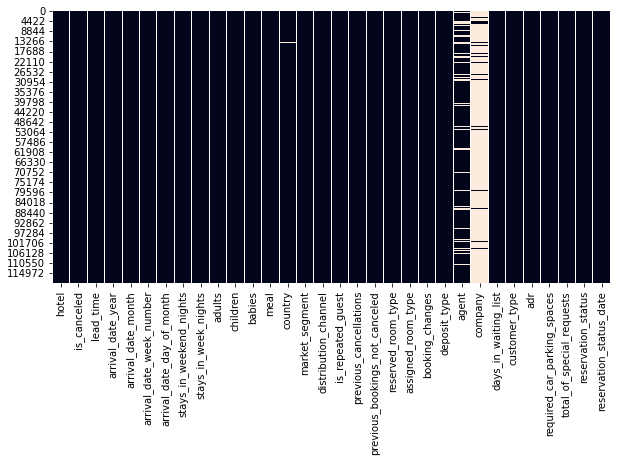

In [36]:
# By using this heatmap we can see the distribution of null values in the dataframe
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False)

In [37]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### What did you know about your dataset?

The dataset given is a dataset from hotel industry, and we have to explore and analyze the data to discover important factors that govern the bookings.

The goal is to analyze the dataset and get valuable insights and based on that ta.......

The above dataset has 119390 rows and 32 columns. There are no null values in any columns except for 4 columns(children,country,agent,company). The dataset also have 31994 duplicate values

## ***2. Understanding Your Variables***

In [38]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [39]:
# Dataset Describe
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


### Variables Description 

* **Hotel:**  H1= Resort Hotel, H2= City Hotel
* **is_canceled** : If the booking was canceled(1) or not(0)
* **lead_time** : Number of days that elapsed between the entering date of the  booking into the PMS(Property Management System) and the arrival date
* **arrival_date_year** : Year of arrival date.
* **arrival_date_month** : Month of arrival date.
* **arrival_date_week_number** : Week number for arrival date.
* **arrival_date_day_of_month**: Which day of the months guest is arriving.
* **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
* **stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.
* **adults** : Number of adults.
* **children** : Number of children.
* **babies** : Number of babies.
* **meal**: kind of meal opted for.
* **country** : Country code.
* **market_segment**: Through which channel hotels were booked.
* **distribution_channel** : How the customer accessed the stay- Corporate Booking/Direct/TA.TO
* **is_repeated_guest** : The values indicating if the booking name was from a repeated guest (1) or not (0).
* **previous_cancellations** : Was there a cancellation before.
* **previous_bookings_not_canceled** : Count of previous bookings not cancelled.
* **reserved_room_type** : Code of room type reserved.
* **assigned_room_type** : Code for the type of room assigned to the booking.
* **booking_changes** : Count of changes made to booking.
* **deposit_type** : Deposit type.
* **agent** : If the booking happens through agents or not.
* **company** : If the booking happens through companies, the company ID that made the booking or responsible for paying the booking.
* **days_in_waiting_list** : Number of days the booking was on the waiting list before the confirmation to the customer.
* **customer_type** : Booking type like Transient – Transient-Party – Contract – Group.
* **adr** : Average Daily Rates that described via way of means of dividing the sum of all accommodations transactions using entire numbers of staying nights.
* **required_car_parking_spaces** : How many parking areas are necessary for the customers.
* **total_of_special_requests** : Total unique requests from consumers.
* **reservation_status**: The last status of reservation, assuming one of three categories: Canceled – booking was cancelled by the customer; Check-Out;No-Show.
* **reservation_status_date**: The last status date.

### Check Unique Values for each variable.

In [40]:
# Check Unique Values for each variable.
for item in list(df.columns):
  print(f"Column name: {item} - No. of unique values: {df[item].nunique()}")

Column name: hotel - No. of unique values: 2
Column name: is_canceled - No. of unique values: 2
Column name: lead_time - No. of unique values: 479
Column name: arrival_date_year - No. of unique values: 3
Column name: arrival_date_month - No. of unique values: 12
Column name: arrival_date_week_number - No. of unique values: 53
Column name: arrival_date_day_of_month - No. of unique values: 31
Column name: stays_in_weekend_nights - No. of unique values: 17
Column name: stays_in_week_nights - No. of unique values: 35
Column name: adults - No. of unique values: 14
Column name: children - No. of unique values: 5
Column name: babies - No. of unique values: 5
Column name: meal - No. of unique values: 5
Column name: country - No. of unique values: 177
Column name: market_segment - No. of unique values: 8
Column name: distribution_channel - No. of unique values: 5
Column name: is_repeated_guest - No. of unique values: 2
Column name: previous_cancellations - No. of unique values: 15
Column name: 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [41]:
# Firstly lets make a copy of our df to work on
copy_df=df.copy()

In [42]:
copy_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [43]:
# The first thing we need to do to make our data clean is delete duplicate values from the dataset
copy_df.drop_duplicates(inplace=True)
copy_df.shape

(87396, 32)

In [44]:
# Now checking percenatge of null values for each column
100*(copy_df.isna().sum()/copy_df.shape[0]).sort_values(ascending=False)

company                           93.982562
agent                             13.951439
country                            0.517186
children                           0.004577
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

In [45]:
# Here we can see that the company column has approx 94% missing data, which is very high so we should drop that column
copy_df.drop(columns=['company'],inplace=True)

In [46]:
# Now for other columns they have less % of null values, so we can just replace them.
copy_df.agent.fillna(0,inplace=True)
copy_df.country.fillna('Others',inplace=True)
copy_df.children.fillna(0,inplace=True)

In [47]:
# Now again checking for Missing Values/Null Values Count
temp_df=copy_df.isnull().sum().reset_index().rename(columns={'index':'Columns',0:'Null Values'})
px.bar(temp_df,x='Columns',y='Null Values',width= 1000, height= 500,text_auto=True)

In [48]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [49]:
# In the above info we can see the datatypes of all columns are correct except for children and agent.
# So to make further operations easy we should change their datatypes to suitable types.
copy_df['children']=copy_df['children'].astype(int)
copy_df['babies']=copy_df['babies'].astype(int)

In [50]:
copy_df[['children','babies']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   children  87396 non-null  int64
 1   babies    87396 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [51]:
# Now babies, adults, and childrens can't be zero at the same time, so we can drop all the observations having zero at the same time.
copy_df=copy_df[~((copy_df['adults']==0) & (copy_df['children']==0) & (copy_df['babies']==0))]

In [52]:
copy_df.shape

(87230, 31)

In [ ]:
# Adding new columns for analysis

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***